## Deep Learning Project: Build a Traffic Sign Recognition Classifier
This project explores the deep learning process, making use of TensorFlow to build a model (similar to the LeNet model) that is able to classify traffic signs with up to ~94% accuracy.

In five main steps:
* Step 0: Load the Data
* Step 1: Data Summary & Exploration
* Step 2: Design and Test a Model Architecture
* Step 3: Test the Model on New images
* Step 4: Visualize the Neural Network's State with Test Images

## Step 0: Load the Data

In [1]:
# Load pickled data
import pickle

# Load, open, and assign training, validation, and testing data for German traffic signs

# File address
training_file = 'traffic_signs_data/train.p'
validation_file = 'traffic_signs_data/valid.p'
testing_file = 'traffic_signs_data/test.p'

# Opening files
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Assigning features and label data (input and output)
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---
## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary, but the two that will be used are the features (inputs) and labels (outputs)
- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.

### Dataset Summary

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_validation)

# Number of testing examples.
n_test = len(X_test)

# Shape of traffic sign images
image_shape = X_train[0].shape

# Number of unique classes/labels
n_classes = np.amax(y_train) - np.amin(y_train) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory Visualization

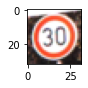

1


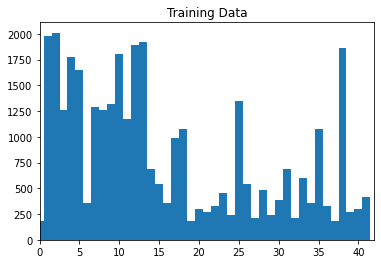

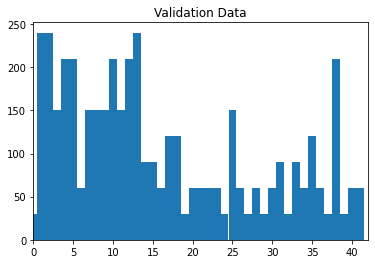

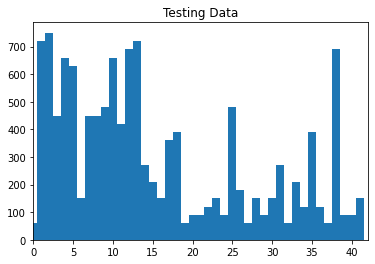

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Choose a random image from the data set
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# Plot the random image and display the label as well
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()
print(y_train[index])

# Create histograms of labels for each data set
train_hist, train_edges = np.histogram(y_train, bins = range(43))
valid_hist, valid_edges = np.histogram(y_validation, bins = range(43))
test_hist, test_edges = np.histogram(y_test, bins = range(43))

# Plot histograms
plt.bar(train_edges[:-1], train_hist, width = 1)
plt.title('Training Data')
plt.xlim(min(train_edges), max(train_edges))
plt.show()
plt.bar(valid_edges[:-1], valid_hist, width = 1)
plt.title('Validation Data')
plt.xlim(min(valid_edges), max(valid_edges))
plt.show()
plt.bar(test_edges[:-1], test_hist, width = 1)
plt.title('Testing Data')
plt.xlim(min(valid_edges), max(valid_edges))
plt.show()

----
## Step 2: Design and Test the Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

In [4]:
# Obtain teh shuffle to randomize the batches for each run
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Normalize the data of 8 bits to be between [-1,1) instead of [0,255]
X_train = X_train/128 - 1
X_validation = X_validation/128 - 1
X_test = X_test/128 - 1

### Model Architecture

In [5]:
import tensorflow as tf

# Set some of the Hyperparameters
EPOCHS = 15
BATCH_SIZE = 32
keep_prob = tf.placeholder(tf.float32)

from tensorflow.contrib.layers import flatten

# Create LeNet-adjusted architecture
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Weights creates as a dictionary using the truncated_normal using below input shapes
    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    }

    biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bd1': tf.Variable(tf.zeros(120)),
        'bd2': tf.Variable(tf.zeros(84)),
        'out': tf.Variable(tf.zeros(43))
    }
    
    # Set strides to be 1
    strides_set = [1, 1, 1, 1]

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    layer1 = tf.nn.conv2d(x,weights['wc1'], strides=strides_set, padding='VALID')
    layer1 = tf.add(layer1,biases['bc1'])
    # ReLU Activation
    layer1 = tf.nn.relu(layer1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    k_size = [1, 2, 2, 1]
    pool_stride = [1, 2, 2, 1]
    pool1 = tf.nn.max_pool(layer1, ksize=k_size, strides=pool_stride, padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    layer2 = tf.nn.conv2d(pool1,weights['wc2'], strides=strides_set, padding='VALID')
    layer2 = tf.add(layer2,biases['bc2'])    
    # ReLU Activation
    layer2 = tf.nn.relu(layer2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(layer2, ksize=k_size, strides=pool_stride, padding='VALID')
                           
    # Flatten. Input = 5x5x16. Output = 400.
    flatten = tf.reshape(pool2, [-1, weights['wd1'].get_shape().as_list()[0]])
                           
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(flatten,weights['wd1']),biases['bd1'])
    # ReLU Activation and dropout
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1,weights['wd2']),biases['bd2'])
    # ReLU Activation and Dropout
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2,weights['out']),biases['out'])
    
    return logits, layer1, pool1, layer2, pool2, fc1, fc2

C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\IntroToTens

### Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
One-hot encoding 

In [6]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

#### Training Pipeline

In [18]:
# Set Hyperparameter learning rate
rate = 0.0005

# Output all layers of CNN, then set cross entropy using softmax, loss calculation, AdamOptimizer, and training operation
logits, layer1, pool1, layer2, pool2, fc1, fc2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [8]:
# Compared the maximum softmax prediction to the label, check if the label is correct
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the accuracy of the prediction
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize the model saving function
saver = tf.train.Saver()

# Create evaluate function for testing purposes
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the Model
Run the training data through the training pipeline to train the model.
* Before each epoch, shuffle the training set.
* After each epoch, measure the loss and accuracy of the validation set.
* Save the model after training.

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.826
Validation Accuracy = 0.764

EPOCH 2 ...
Training Accuracy = 0.921
Validation Accuracy = 0.866

EPOCH 3 ...
Training Accuracy = 0.955
Validation Accuracy = 0.904

EPOCH 4 ...
Training Accuracy = 0.976
Validation Accuracy = 0.921

EPOCH 5 ...
Training Accuracy = 0.977
Validation Accuracy = 0.928

EPOCH 6 ...
Training Accuracy = 0.983
Validation Accuracy = 0.944

EPOCH 7 ...
Training Accuracy = 0.989
Validation Accuracy = 0.941

EPOCH 8 ...
Training Accuracy = 0.988
Validation Accuracy = 0.943

EPOCH 9 ...
Training Accuracy = 0.992
Validation Accuracy = 0.956

EPOCH 10 ...
Training Accuracy = 0.992
Validation Accuracy = 0.950

EPOCH 11 ...
Training Accuracy = 0.994
Validation Accuracy = 0.952

EPOCH 12 ...
Training Accuracy = 0.995
Validation Accuracy = 0.961

EPOCH 13 ...
Training Accuracy = 0.995
Validation Accuracy = 0.959

EPOCH 14 ...
Training Accuracy = 0.992
Validation Accuracy = 0.956

EPOCH 15 ...
Training Accuracy = 0.996
Valid

## Evaluate the Model
The model is run one time using the testing batch of german traffic signs, providing a more accurate final accuracy % of classifying traffic signs.

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.941


---
## Step 3: Test the Model on New Images

Five pictures of German traffic signs were obtained from a Google image search, and the model is run to test them.

### Load and Output the Images

In [11]:
import os
import matplotlib.image as mpimg
# Load the images from the local folder
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

<Figure size 360x360 with 0 Axes>

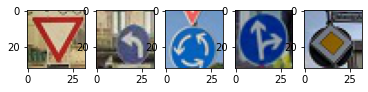

In [12]:
filepath = 'new_images/'
images = load_images(filepath)

# Show the five images
fig = plt.figure(figsize=(5, 5))  # width, height in inches

fig,ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(images[i])

### Predict the Sign Type for Each Image
Labels should be (in order)

* 13: Yield
* 34: Turn left ahead
* 40: Roundabout mandatory
* 36: Go straight or right
* 12: Priority road

In [13]:
for i in range(5):
    images[i] = images[i]/128 - 1
images = np.asarray(images)
images_labels = np.transpose([13, 34, 40, 36, 12])

In [14]:
# The session is re-initialize and the model is loaded. 
# Then both the predictions and comparisons to the correct label is given
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: images, y: images_labels, keep_prob:1})
    print(prediction)
    compare = sess.run(correct_prediction, feed_dict={x: images, y: images_labels, keep_prob:1})
    print(compare)

INFO:tensorflow:Restoring parameters from .\lenet
[13 38 33 36 12]
[ True False False  True  True]


### Analyze Performance

In [15]:
# The accuracy is calculated for the five new images (out of 1)
overall_accuracy = sum(compare)/5
print(overall_accuracy)

0.6


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For the five images below, `the tf.nn.top_k` function finds the top 5 softmax confidence calculation for each sign.
The assoiated indices (labels) are provided in the exact same order (most likle to least likely)

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_5 = sess.run(tf.nn.softmax(logits, 1), feed_dict={x: images, y: images_labels, keep_prob:1})
    top_softmax = sess.run(tf.nn.top_k(tf.constant(top_5), k=5))
    print(top_softmax)

INFO:tensorflow:Restoring parameters from .\lenet
TopKV2(values=array([[1.0000000e+00, 1.5166985e-27, 4.2100749e-31, 1.8764231e-31,
        8.8861330e-34],
       [5.8867669e-01, 3.3504558e-01, 5.1522858e-02, 9.4862832e-03,
        5.8410140e-03],
       [5.4166108e-01, 2.2028501e-01, 1.7195724e-01, 5.1467367e-02,
        6.6342852e-03],
       [9.9999952e-01, 4.6264176e-07, 2.1821421e-08, 5.7370031e-10,
        9.4956619e-11],
       [1.0000000e+00, 1.7749842e-30, 3.5834999e-31, 2.6087753e-31,
        6.6963336e-33]], dtype=float32), indices=array([[13,  9, 12, 10, 35],
       [38, 34, 35, 36,  9],
       [33, 34, 38, 40, 39],
       [36, 38, 41, 12, 32],
       [12, 41, 11, 14, 38]]))


---
## Step 4: Visualize the Neural Network's State with Test Images

Visualizing the create CNN's state at different layers of the model below using feature maps.

In [19]:
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

# Specifically, only the second layer is observed as it contains more details
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(outputFeatureMap(images, layer2))

INFO:tensorflow:Restoring parameters from .\lenet


FailedPreconditionError: Attempting to use uninitialized value Variable_11
	 [[node Variable_11/read (defined at <ipython-input-5-0d228b9ec1f5>:19) ]]

Caused by op 'Variable_11/read', defined at:
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\asyncio\base_events.py", line 442, in run_forever
    self._run_once()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\asyncio\base_events.py", line 1462, in _run_once
    handle._run()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-2b3ad0b244c2>", line 5, in <module>
    logits, layer1, pool1, layer2, pool2, fc1, fc2 = LeNet(x)
  File "<ipython-input-5-0d228b9ec1f5>", line 19, in LeNet
    'wc2': tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma)),
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\variables.py", line 1395, in __init__
    constraint=constraint)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3889, in identity
    "Identity", input=input, name=name)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\Ryan\anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_11
	 [[node Variable_11/read (defined at <ipython-input-5-0d228b9ec1f5>:19) ]]
